# Librerias

In [2]:
pip install mip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install itertools

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement itertools (from versions: none)
ERROR: No matching distribution found for itertools


In [ ]:
pip install itertools

In [4]:
from mip import Model, BINARY, xsum, minimize
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from itertools import product
from datetime import date
from datetime import datetime
from datetime import timedelta

import networkx as nx

# Tarea Computacional 2 GOA
- Thomas Buddemberg
- Fabián Loyola
- Simón Morales
- Felipe Tiznado 
## Problema 1 

In [23]:
nodos = [1,2,3,4,5,6,7,8,9,10,11,12]

nodos_0 = {1:"x1",2:"x2",3:"x3",4:"x4",5:"x5",6:"x6",7:"x7",8:"x8",9:"x9",10:"x10",11:"x11",12:"x12"}

arcos = {(1,2),(1,3),(2,4),(2,5),(2,11),(2,6),(6,3),(4,7),(7,8),(8,5),
         (5,10),(10,11),(7,9),(9,11),(11,12),(3,7)}

arcos0 = {(1,3),(2,4),(2,5),(2,6),(6,3),(4,7),(7,8),(8,5),
         (5,10),(10,11),(7,9),(9,11),(3,7)}

arcos1 = {(1,2),(2,11),(11,12)}

arcos2 = {(1,2),(1,3),(2,4),(2,5),(2,11),(2,6),(7,8),
         (5,10),(10,11),(7,9),(9,11),(11,12),(3,7)}

arcos_0 = {(1,2):"t1.2",(1,3):"t1.3",(2,4):"t2.4",(2,5):"t2.5",(2,11):"t2.11",(2,6):"t2.6",(6,3):"t6.3",(4,7):"t4.7",
           (7,8):"t7.8",(8,5):"t8.5",(5,10):"t5.10",(10,11):"t10.11",(7,9):"t7.9",(9,11):"t9.11",(11,12):"t11.12",(3,7):"t3.7"}

arcos_n = {(1,2):"A",(1,3):"B",(2,4):"C",(2,5):"D",(2,11):"J",(2,6):"E",(6,3):"P1",(4,7):"P2",(7,8):"H",(8,5):"P3",
         (5,10):"I",(3,7):"F",(10,11):"L",(7,9):"G",(9,11):"K",(11,12):"M"}

arcos_n2 = {(1,2):"A",(1,3):"B",(2,4):"C",(2,5):"D",(2,11):"J",(2,6):"E",(7,8):"H",
         (5,10):"I",(3,7):"F",(10,11):"L",(7,9):"G",(9,11):"K",(11,12):"M"}

N = {(1,2):12,(1,3):10,(2,4):14,(2,5):21,(2,11):60,(2,6):10,(6,3):0,(4,7):0,(7,8):3,(8,5):0,
         (5,10):28,(10,11):10,(7,9):21,(9,11):14,(11,12):20,(3,7):2}

M = {(1,2):8,(1,3):7,(2,4):12,(2,5):16,(2,11):50,(2,6):6,(6,3):0,(4,7):0,(7,8):3,(8,5):0,
         (5,10):21,(10,11):8,(7,9):14,(9,11):10,(11,12):14,(3,7):2}

N_cost = {(1,2):1200,(1,3):2200,(2,4):100,(2,5):60,(2,11):6000,(2,6):1200,(6,3):0,(4,7):0,(7,8):3000,(8,5):0,
         (5,10):28800,(10,11):2000,(7,9):17400,(9,11):2880,(11,12):2000,(3,7):2000}

M_cost = {(1,2):1400,(1,3):2440,(2,4):300,(2,5):360,(2,11):6500,(2,6):2000,(6,3):0,(4,7):0,(7,8):3000,(8,5):0,
         (5,10):31600,(10,11):2200,(7,9):21600,(9,11):3200,(11,12):2420,(3,7):2000}

b = {(1,2):50,(1,3):80,(2,4):100,(2,5):60,(2,11):50,(2,6):200,(7,8):0,
         (5,10):400,(3,7):0,(10,11):100,(7,9):600,(9,11):80,(11,12):70,(6,3):0,(4,7):0,(8,5):0}

a = {(1,2):1800,(1,3):3000,(2,4):1500,(2,5):1320,(2,11):9000,(2,6):3200,(7,8):0,
         (5,10):40000,(3,7):0,(10,11):3000,(7,9):30000,(9,11):4000,(11,12):3400,(6,3):0,(4,7):0,(8,5):0}

rutas = {1:(1,2,11,12),2:(1,2,4,7,8,5,10,11,12),3:(1,2,4,7,9,11,12),4:(1,2,6,3,7,8,5,10,11,12),5:(1,2,6,3,7,9,11,12),
         6:(1,3,7,8,5,10,11,12),7:(1,3,7,9,11,12)}

### a) Graficar la red del proyecto.

Este codigo nos ayudara a encontrar los tiempos más cercanos y los tiempos más lejanos para realizar el gráfico.

In [24]:
m = Model()

x = {i: m.add_var() for i in nodos} #tiempo de inicio más próximo para el nodo i

# Función Objetivo
m.objective = minimize(
    xsum(x[i] for i in nodos)
    )

for (i,j) in arcos:
  m += (x[j]-x[i]) >= N[i,j] #Restriccion_1

m.optimize()

makespan = x[12].x

if m.num_solutions:
  for (i,j) in arcos:
    print(arcos_n[i,j], "=>",x[j].x-x[i].x)
    if (x[j].x-x[i].x) != N[i,j]:
      print("La actividad {} tiene una holgura de {}".format(arcos_n[i,j], (x[j].x-x[i].x) - N[i,j])) 

A => 12.0
P2 => 0.0
B => 22.0
La actividad B tiene una holgura de 12.0
E => 10.0
I => 28.0
L => 11.0
La actividad L tiene una holgura de 1.0
M => 20.0
J => 60.0
P3 => 4.0
La actividad P3 tiene una holgura de 4.0
P1 => 0.0
K => 25.0
La actividad K tiene una holgura de 11.0
F => 4.0
La actividad F tiene una holgura de 2.0
D => 21.0
H => 3.0
C => 14.0
G => 21.0


In [25]:
m = Model()

t = {(i, j): m.add_var() for (i, j) in arcos} #tiempo requerido para terminar la actividad (i, j) "arco"
x_1 = {i: m.add_var() for i in nodos} #tiempo de inicio más próximo para el nodo i

# Función Objetivo
m.objective = minimize(
    12*x_1[12] - xsum(x_1[i] for i in nodos[0:11])
    )

for (i,j) in arcos:
  m += (x_1[j]-x_1[i]) >= N[i,j] #Restriccion_1

m.optimize()

makespan_0 = x_1[12].x

if m.num_solutions:
  print("")
  for (i,j) in arcos:
    print(arcos_n[i,j], "=>",x_1[j].x-x_1[i].x)
    if (x_1[j].x-x_1[i].x) != N[i,j]:
      print("La actividad {} tiene una holgura de {}".format(arcos_n[i,j], (x_1[j].x-x_1[i].x) - N[i,j])) 


A => 12.0
P2 => 0.0
B => 29.0
La actividad B tiene una holgura de 19.0
E => 17.0
La actividad E tiene una holgura de 7.0
I => 28.0
L => 10.0
M => 20.0
J => 60.0
P3 => 0.0
P1 => 0.0
K => 14.0
F => 2.0
D => 22.0
La actividad D tiene una holgura de 1.0
H => 3.0
C => 19.0
La actividad C tiene una holgura de 5.0
G => 27.0
La actividad G tiene una holgura de 6.0


In [26]:
for i in nodos:
  print("Nodo {}".format(i))
  print("Tiempo de inicio más próximo:",x[i].x)
  print("Tiempo de inicio más lejanos:",x_1[i].x)
  print("")

Nodo 1
Tiempo de inicio más próximo: 0.0
Tiempo de inicio más lejanos: 0.0

Nodo 2
Tiempo de inicio más próximo: 12.0
Tiempo de inicio más lejanos: 12.0

Nodo 3
Tiempo de inicio más próximo: 22.0
Tiempo de inicio más lejanos: 29.0

Nodo 4
Tiempo de inicio más próximo: 26.0
Tiempo de inicio más lejanos: 31.0

Nodo 5
Tiempo de inicio más próximo: 33.0
Tiempo de inicio más lejanos: 34.0

Nodo 6
Tiempo de inicio más próximo: 22.0
Tiempo de inicio más lejanos: 29.0

Nodo 7
Tiempo de inicio más próximo: 26.0
Tiempo de inicio más lejanos: 31.0

Nodo 8
Tiempo de inicio más próximo: 29.0
Tiempo de inicio más lejanos: 34.0

Nodo 9
Tiempo de inicio más próximo: 47.0
Tiempo de inicio más lejanos: 58.0

Nodo 10
Tiempo de inicio más próximo: 61.0
Tiempo de inicio más lejanos: 62.0

Nodo 11
Tiempo de inicio más próximo: 72.0
Tiempo de inicio más lejanos: 72.0

Nodo 12
Tiempo de inicio más próximo: 92.0
Tiempo de inicio más lejanos: 92.0



##  b) Realizar un modelo de optimización que le permita contestar lo siguiente:

- i.	La duración del proyecto

- ii.	El camino crítico para la duración normal de cada actividad.

- iii.	Si la cosecha (actividad F) debe empezar el 15 de julio del 2022, ¿en qué día debe empezarse todo el proyecto?

b.i) Makespan del proyecto en condiciones normales: 92 días.

Los nodos de la ruta critica son: (1, 2, 11, 12)
b.ii) La ruta critica es A-J-M.

b.iii) Para que la cosecha (Actividad F) comience el 15 de Julio del 2022, el proyecto debe comenzar el 23 de Junio del 2022.


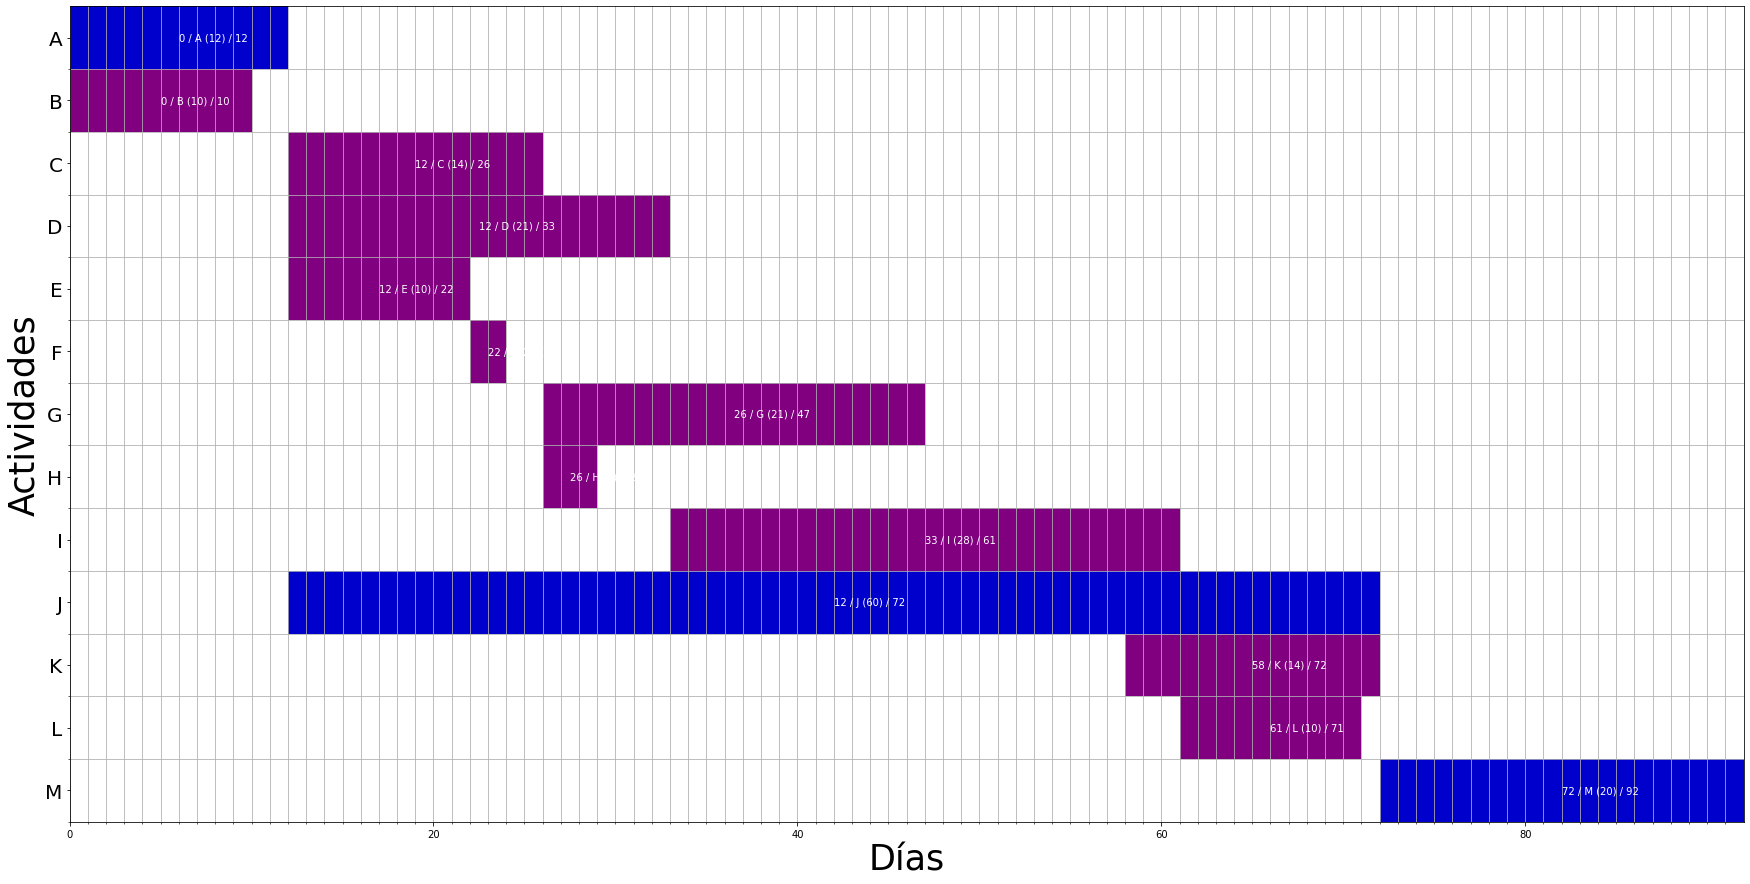

In [31]:
m = Model()

t_0 = {(i, j): m.add_var() for (i, j) in arcos} #tiempo requerido para terminar la actividad (i, j) "arco"
x_0 = {i: m.add_var() for i in nodos} #tiempo de inicio más próximo para el nodo i

# Funcion Objetivo
m.objective = minimize(
    xsum(x[i] for i in nodos)
    )

for (i,j) in arcos:
  m += (x_0[j]-x_0[i]) >= t_0[(i,j)] #Restriccion_1

  m += t_0[(i,j)] == N[(i,j)] #Restriccion_2

m += x_0[3] == x_0[6] #Restriccion_3

m.optimize()

makespan_1 = x_0[12].x

def current_date_format(date):
    months = ("Enero", "Febrero", "Marzo", "Abri", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre")
    day = date.day
    month = months[date.month - 1]
    year = date.year
    messsage = "{} de {} del {}".format(day, month, year)

    return messsage

actF = datetime(2022, 7, 15, 15, 00, 00, 00000)
nueva_fecha = actF - timedelta(days=(t_0[(1,2)].x+t_0[(2,6)].x))

if m.num_solutions:
  print("b.i) Makespan del proyecto en condiciones normales: {} días.\n".format(round(makespan_1)))
  sumas = []

  for i in range(1,8):
      sumas.append(sum(rutas[i]))

  for i in range(1,8):
      if sum(rutas[i]) == min(sumas):
          print("Los nodos de la ruta critica son: {}".format(rutas[i]))
  print("b.ii) La ruta critica es A-J-M.\n")
  print("b.iii) Para que la cosecha (Actividad F) comience el {}, el proyecto debe comenzar el {}.".format(current_date_format(actF),current_date_format(nueva_fecha)))

fig, gantt = plt.subplots(figsize=(30,15))

gantt.set_xlabel("Días")
gantt.set_ylabel("Actividades")

gantt.set_xlim(0, x_0[12].x)
gantt.set_ylim(0, 13*13)

gantt.set_xticks(range(0, round(x_0[12].x), 1), minor=True)
gantt.grid(True, axis='x', which='both')

gantt.set_yticks(range(0, 13*13, 13), minor=True)
gantt.grid(True, axis='y', which='minor')

gantt.set_xlabel("Días", fontsize=35)
gantt.set_ylabel("Actividades", fontsize=35)

actividades = ["M","L","K","J","I","H","G","F","E","D","C","B","A"]

gantt.set_yticks(np.arange(13/2, 13*13 - 13/2 + 13,
                           13))
gantt.set_yticklabels(actividades, fontsize=20)

def agregar_tarea(t0, d, act, nombre, color):
    iact = actividades.index(act)
    gantt.broken_barh([(t0, d)], (13*iact, 13),
                      facecolors=(color))
    # Posición del texto:
    gantt.text(x=(t0 + d/2), y=(13*iact + 13/2),
                  s=f"{round(t0)} / {nombre} ({d}) / {round(t0+d)}", va='center', color='white')

  
for (i,j) in arcos0:
    if int(t_0[i,j].x) != 0:
        agregar_tarea(x_0[i].x, int(t_0[i,j].x), arcos_n[(i,j)], arcos_n[(i,j)], "purple")

for (i,j) in arcos1:
    if int(t_0[i,j].x) != 0:
        agregar_tarea(x_0[i].x, int(t_0[i,j].x), arcos_n[(i,j)], arcos_n[(i,j)], "mediumblue")

plt.savefig("Normal.png")

##  c) Realizar una carta Gantt y encontrar el costo total asociado al proyecto en condiciones normales

Respuesta c):
- Costo total asociado al proyecto en condiciones normales: $104989
- Carta Gantt:


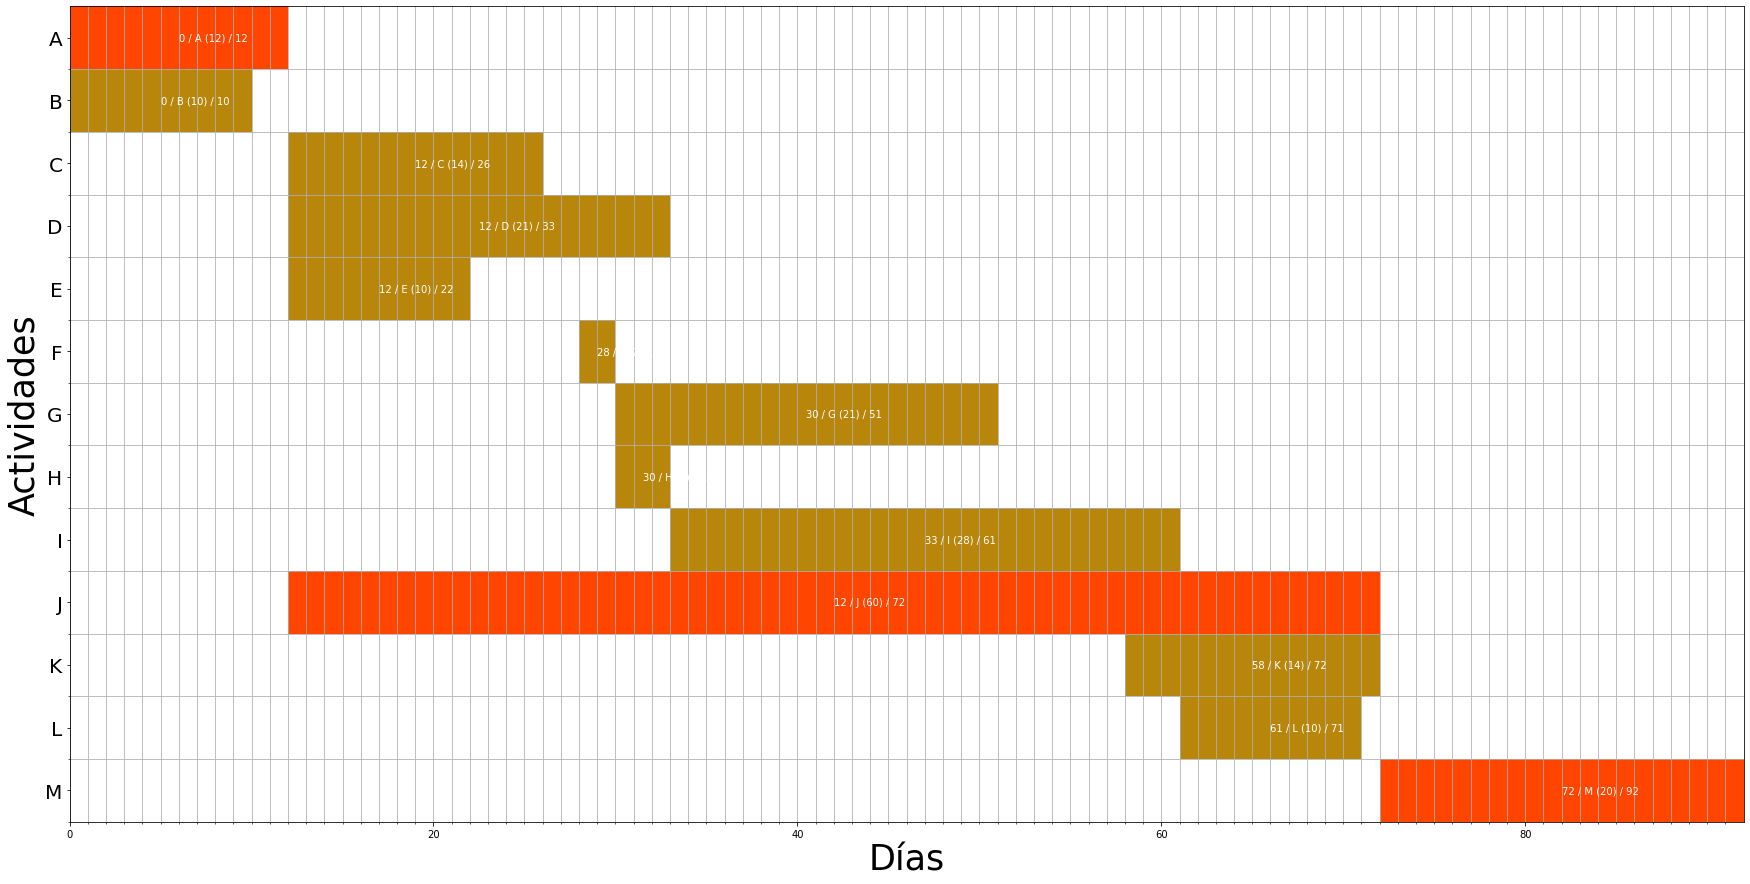

In [33]:
m = Model()

t_1 = {(i, j): m.add_var() for (i, j) in arcos} #tiempo requerido para terminar la actividad (i, j) "arco"
x_2 = {i: m.add_var() for i in nodos} #tiempo de inicio más próximo para el nodo i

# Función Objetivo
m.objective = minimize(
    xsum(a[i,j] - b[(i,j)]*t_1[(i,j)] for (i,j) in arcos) + 250*(x_2[3] - x_2[1])+800*(x_2[10] - x_2[3])+250*(x_2[12] - x_2[10])
    )

for (i,j) in arcos:
  m += (x_2[j]-x_2[i]) >= t_1[(i,j)] #Restriccion_1

  m +=  t_1[(i,j)] == N[(i,j)] #Restriccion_2

m.optimize()

makespan_1 = x_2[12].x

if m.num_solutions:
  print("Respuesta c):\n- Costo total asociado al proyecto en condiciones normales: ${}".format(int(m.objective_value)))
  print("- Carta Gantt:")
    
fig, gantt = plt.subplots(figsize=(30,15))

gantt.set_xlabel("Días")
gantt.set_ylabel("Actividades")

gantt.set_xlim(0, x_2[12].x)
gantt.set_ylim(0, 13*13)

gantt.set_xticks(range(0, round(x_2[12].x), 1), minor=True)
gantt.grid(True, axis='x', which='both')

gantt.set_yticks(range(0, 13*13, 13), minor=True)
gantt.grid(True, axis='y', which='minor')

gantt.set_xlabel("Días", fontsize=35)
gantt.set_ylabel("Actividades", fontsize=35)

actividades = ["M","L","K","J","I","H","G","F","E","D","C","B","A"]

gantt.set_yticks(np.arange(13/2, 13*13 - 13/2 + 13,
                           13))
gantt.set_yticklabels(actividades, fontsize=20)

def agregar_tarea(t0, d, act, nombre, color):
    iact = actividades.index(act)
    gantt.broken_barh([(t0, d)], (13*iact, 13),
                      facecolors=(color))
    gantt.text(x=(t0 + d/2), y=(13*iact + 13/2),
                  s=f"{round(t0)} / {nombre} ({d}) / {round(t0+d)}", va='center', color='white')

  
for (i,j) in arcos0:
    if int(t_1[i,j].x) != 0:
        agregar_tarea(x_2[i].x, int(t_1[i,j].x), arcos_n[(i,j)], arcos_n[(i,j)], "darkgoldenrod")

for (i,j) in arcos1:
    if int(t_1[i,j].x) != 0:
        agregar_tarea(x_2[i].x, int(t_1[i,j].x), arcos_n[(i,j)], arcos_n[(i,j)], "orangered")

plt.savefig("Normal-Costo.png")

### d) Realizar un modelo de optimización que le permite encontrar la duración del proyecto al costo mínimo

i.	Si la cosecha y procesamiento de los arvejas no se termina en **30 días o menos**, la parte de los arvejas que no lleguen a ser cosechados o procesados en ese tiempo se venderán como comida de animales, lo que implica pérdidas para el proyecto. 

**¿Se logra completar la cosecha y procesamiento en dicho tiempo?**

Duración del proyecto: 72 días
Costo mínimo del proyecto: $100239
La ruta crítica es: A-J-M

La actividad A SI fue acelerada. 12 -> 8 días [N:12/M:8]
La actividad B NO fue acelerada. 10 días [N:10/M:7]
La actividad E NO fue acelerada. 10 días [N:10/M:6]
La actividad I SI fue acelerada. 28 -> 21 días [N:28/M:21]
La actividad L NO fue acelerada. 10 días [N:10/M:8]
La actividad M SI fue acelerada. 20 -> 14 días [N:20/M:14]
La actividad J SI fue acelerada. 60 -> 50 días [N:60/M:50]
La actividad K NO fue acelerada. 14 días [N:14/M:10]
La actividad F SI fue acelerada. 2 -> 2 días [N:2/M:2]
La actividad D SI fue acelerada. 21 -> 17 días [N:21/M:16]
La actividad H SI fue acelerada. 3 -> 3 días [N:3/M:3]
La actividad C NO fue acelerada. 14 días [N:14/M:12]
La actividad G NO fue acelerada. 21 días [N:21/M:14]

Respuesta d):
SI se logra cosechar y procesar en menos de 30 días, con un total de 26 días en completar las actividades F-G-H-I.


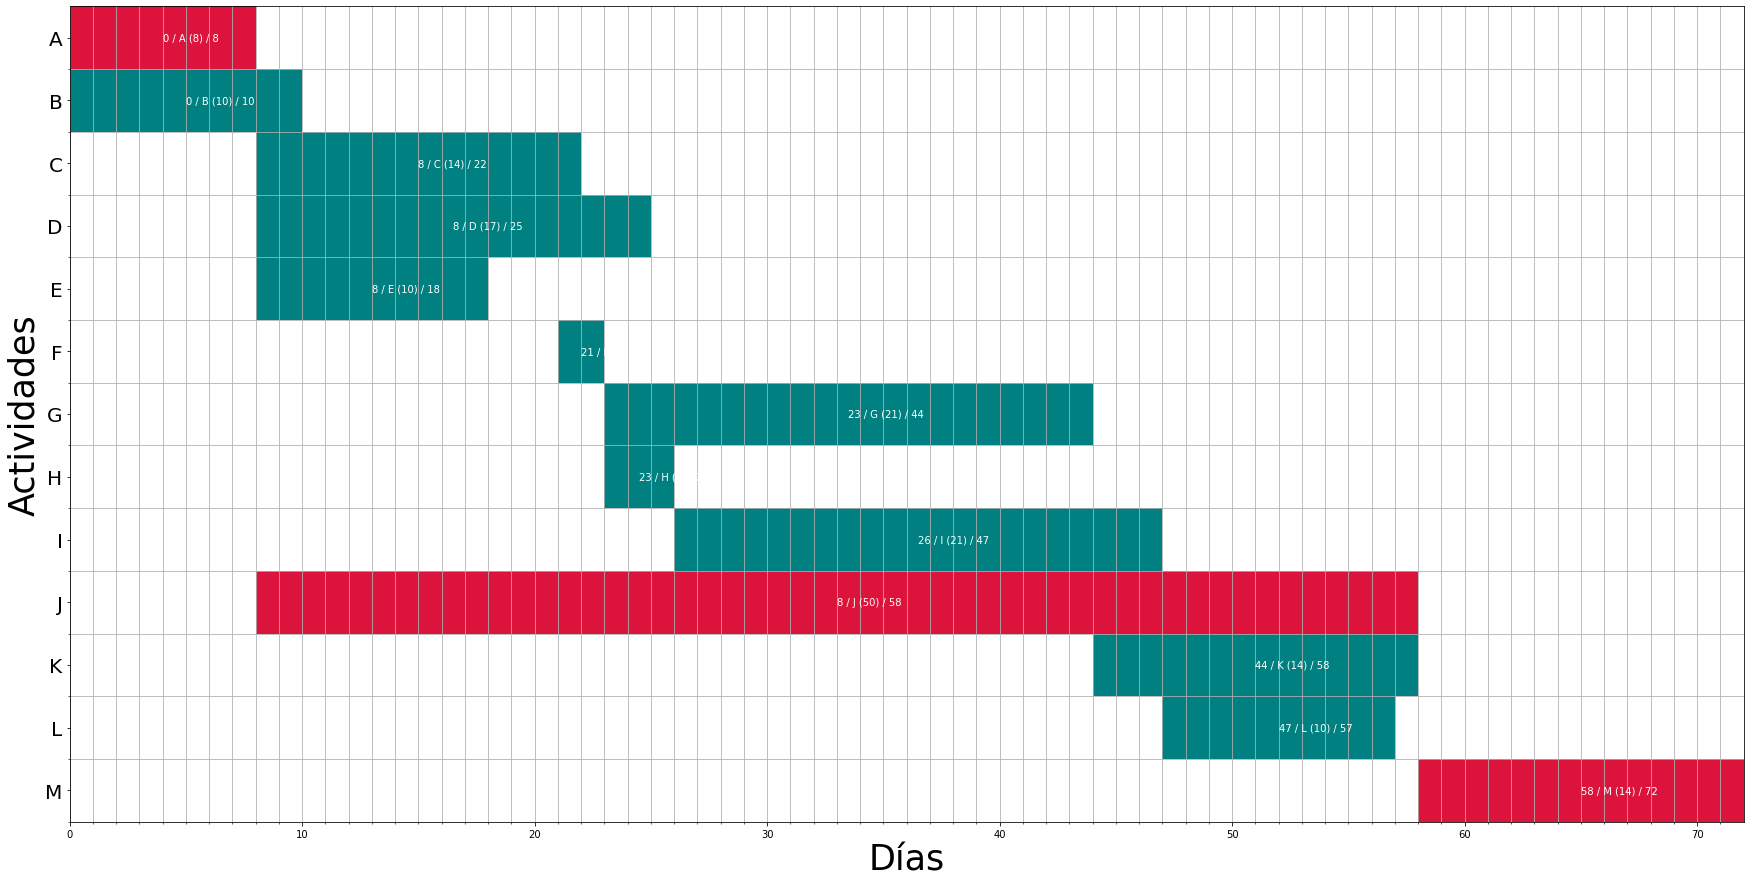

In [8]:
m = Model()

t_2 = {(i, j): m.add_var() for (i, j) in arcos} #tiempo requerido para terminar la actividad (i, j) "arco"
x_3 = {i: m.add_var() for i in nodos} #tiempo de inicio más próximo para el nodo i

# Función Objetivo
m.objective = minimize(
    xsum(a[i,j] - b[(i,j)]*t_2[(i,j)] for (i,j) in arcos) + 250*(x_3[3] - x_3[1])+800*(x_3[10] - x_3[3])+250*(x_3[12] - x_3[10])
    )

for (i,j) in arcos:
  m += (x_3[j]-x_3[i]) >= t_2[(i,j)] #Restriccion_1

  m +=  t_2[(i,j)] <= N[(i,j)] #Restriccion_2

  m +=  t_2[(i,j)] >= M[(i,j)] #Restriccion_3

m.optimize()

makespan_2 = x_3[12].x

if m.num_solutions:
  print("Duración del proyecto: {} días".format(round(makespan_2)))
  print("Costo mínimo del proyecto: ${}".format(int(m.objective_value)))
  print("La ruta crítica es: A-J-M\n")
    
fig, gantt = plt.subplots(figsize=(30,15))

gantt.set_xlabel("Días")
gantt.set_ylabel("Actividades")

gantt.set_xlim(0, x_3[12].x)
gantt.set_ylim(0, 13*13)

gantt.set_xticks(range(0, round(x_3[12].x), 1), minor=True)
gantt.grid(True, axis='x', which='both')

gantt.set_yticks(range(0, 13*13, 13), minor=True)
gantt.grid(True, axis='y', which='minor')

gantt.set_xlabel("Días", fontsize=35)
gantt.set_ylabel("Actividades", fontsize=35)

actividades = ["M","L","K","J","I","H","G","F","E","D","C","B","A"]

gantt.set_yticks(np.arange(13/2, 13*13 - 13/2 + 13,
                           13))
gantt.set_yticklabels(actividades, fontsize=20)

def agregar_tarea(t0, d, act, nombre, color):
    iact = actividades.index(act)
    gantt.broken_barh([(t0, d)], (13*iact, 13),
                      facecolors=(color))
    gantt.text(x=(t0 + d/2), y=(13*iact + 13/2),
                  s=f"{round(t0)} / {nombre} ({d}) / {round(t0+d)}", va='center', color='white')

  
for (i,j) in arcos0:
    if int(t_2[i,j].x) != 0:
        agregar_tarea(x_3[i].x, int(t_2[i,j].x), arcos_n[(i,j)], arcos_n[(i,j)], "teal")

for (i,j) in arcos1:
    if int(t_2[i,j].x) != 0:
        agregar_tarea(x_3[i].x, int(t_2[i,j].x), arcos_n[(i,j)], arcos_n[(i,j)], "crimson")
        

for (i,j) in arcos:
    if int(t_2[i,j].x) == M[i,j] & int(t_2[i,j].x) != 0:
        print("La actividad {} SI fue acelerada. {} -> {} días [N:{}/M:{}]".format(arcos_n[(i,j)], N[i,j], int(t_2[i,j].x), N[i,j], M[i,j]))
    elif int(t_2[i,j].x) >= M[i,j] & int(t_2[i,j].x) != 0 | int(t_2[i,j].x)!=N[i,j]:
        print("La actividad {} SI fue acelerada. {} -> {} días [N:{}/M:{}]".format(arcos_n[(i,j)], N[i,j], int(t_2[i,j].x), N[i,j], M[i,j]))
    elif int(t_2[i,j].x) == N[i,j] | int(t_2[i,j].x) != 0:
        print("La actividad {} NO fue acelerada. {} días [N:{}/M:{}]".format(arcos_n[(i,j)], int(t_2[i,j].x), N[i,j], M[i,j]))
    elif int(t_2[i,j].x) == N[i,j] | int(t_2[i,j].x) == M[i,j] | int(t_2[i,j].x) != 0:
        print("La actividad {} NO fue acelerada. {} días [N:{}/M:{}]".format(arcos_n[(i,j)], int(t_2[i,j].x), N[i,j], M[i,j]))

if (x_3[10].x - x_3[3].x) < 30:
    print("\nRespuesta d):\nSI se logra cosechar y procesar en menos de 30 días, con un total de {} días en completar las actividades F-G-H-I.".format(round(x_3[10].x - x_3[3].x)))
else:
    print("\nRespuesta d):\nNO se logra cosechar y procesar en menos de 30 días, con un total de {} días en completar ambos trabajos.".format(round(x_3[10].x - x_3[3].x)))
    
plt.savefig("Acelerada.png")

### e) Realizar un modelo de optimización que le permita encontrar la duración mínima del proyecto y luego calcule el costo asociado.

Duración del proyecto: 72 días
Costo mínimo del proyecto: $100239
La ruta crítica es: A-J-M

La actividad A SI fue acelerada. 12 -> 8 días [N:12/M:8]
La actividad B NO fue acelerada. 10 días [N:10/M:7]
La actividad E NO fue acelerada. 10 días [N:10/M:6]
La actividad I SI fue acelerada. 28 -> 21 días [N:28/M:21]
La actividad L NO fue acelerada. 10 días [N:10/M:8]
La actividad M SI fue acelerada. 20 -> 14 días [N:20/M:14]
La actividad J SI fue acelerada. 60 -> 50 días [N:60/M:50]
La actividad K NO fue acelerada. 14 días [N:14/M:10]
La actividad F SI fue acelerada. 2 -> 2 días [N:2/M:2]
La actividad D SI fue acelerada. 21 -> 17 días [N:21/M:16]
La actividad H SI fue acelerada. 3 -> 3 días [N:3/M:3]
La actividad C NO fue acelerada. 14 días [N:14/M:12]
La actividad G NO fue acelerada. 21 días [N:21/M:14]


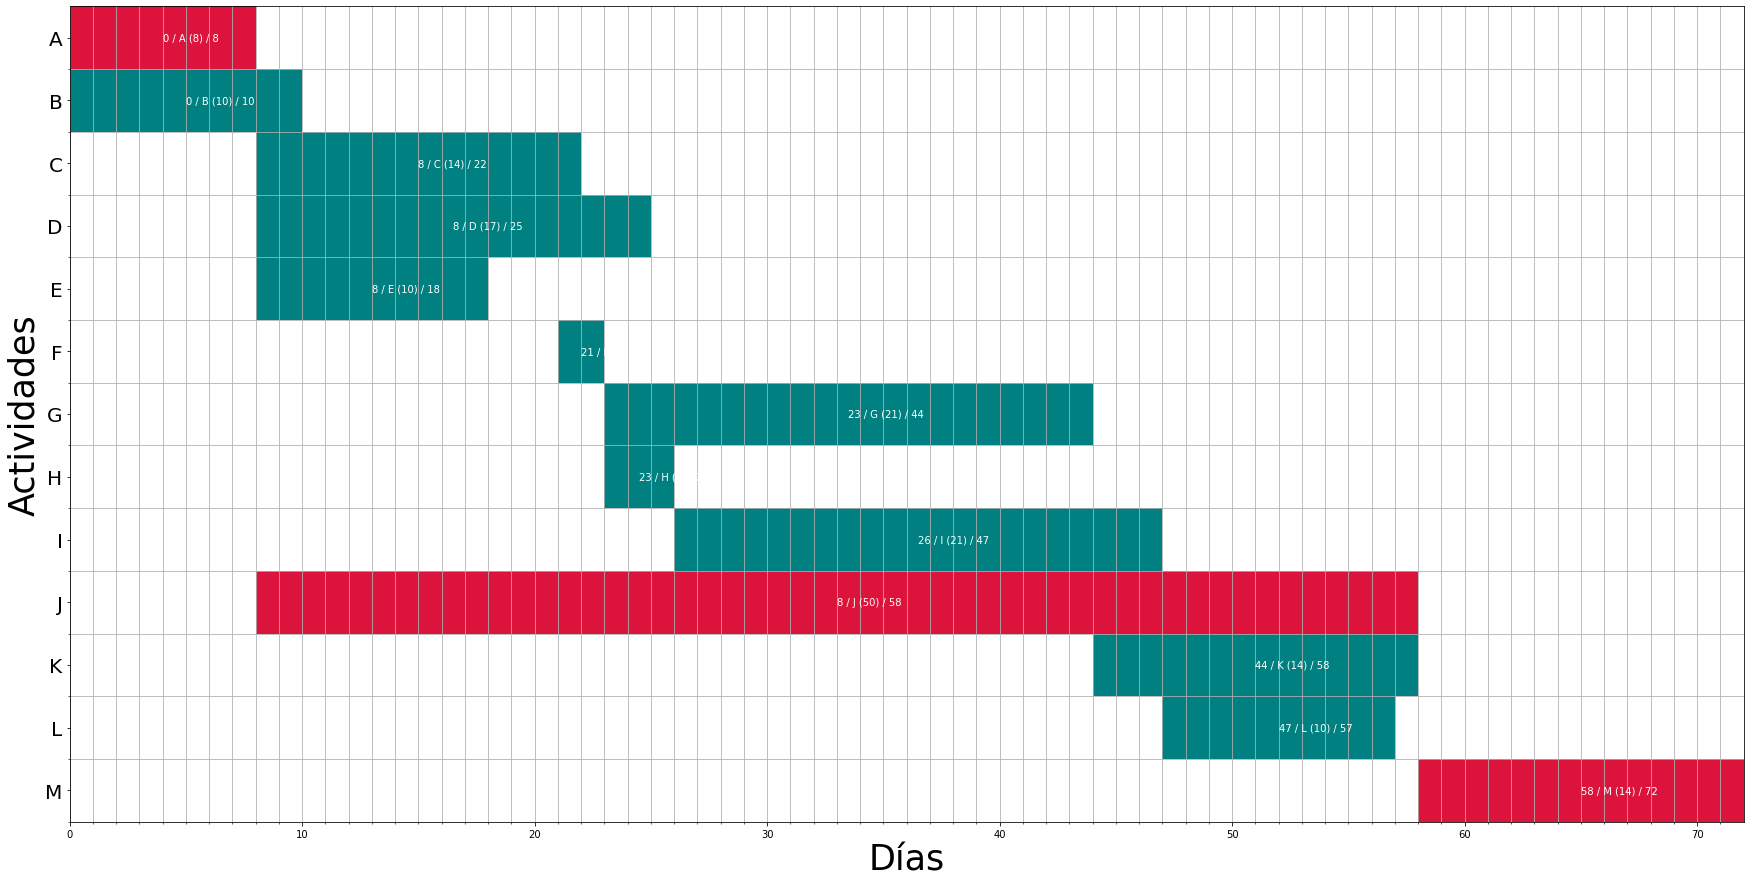

In [9]:
m = Model()

t_2 = {(i, j): m.add_var() for (i, j) in arcos} #tiempo requerido para terminar la actividad (i, j) "arco"
x_3 = {i: m.add_var() for i in nodos} #tiempo de inicio más próximo para el nodo i

# Función Objetivo
m.objective = minimize(
    xsum(a[i,j] - b[(i,j)]*t_2[(i,j)] for (i,j) in arcos) + 250*(x_3[3] - x_3[1])+800*(x_3[10] - x_3[3])+250*(x_3[12] - x_3[10])
    )

for (i,j) in arcos:
  m += (x_3[j]-x_3[i]) >= t_2[(i,j)] #Restriccion_1

  m +=  t_2[(i,j)] <= N[(i,j)] #Restriccion_2

  m +=  t_2[(i,j)] >= M[(i,j)] #Restriccion_3

m.optimize()

makespan_2 = x_3[12].x

if m.num_solutions:
  print("Duración del proyecto: {} días".format(round(makespan_2)))
  print("Costo mínimo del proyecto: ${}".format(int(m.objective_value)))
  print("La ruta crítica es: A-J-M\n")
    
fig, gantt = plt.subplots(figsize=(30,15))

gantt.set_xlabel("Días")
gantt.set_ylabel("Actividades")

gantt.set_xlim(0, x_3[12].x)
gantt.set_ylim(0, 13*13)

gantt.set_xticks(range(0, round(x_3[12].x), 1), minor=True)
gantt.grid(True, axis='x', which='both')

gantt.set_yticks(range(0, 13*13, 13), minor=True)
gantt.grid(True, axis='y', which='minor')

gantt.set_xlabel("Días", fontsize=35)
gantt.set_ylabel("Actividades", fontsize=35)

actividades = ["M","L","K","J","I","H","G","F","E","D","C","B","A"]

gantt.set_yticks(np.arange(13/2, 13*13 - 13/2 + 13,
                           13))
gantt.set_yticklabels(actividades, fontsize=20)

def agregar_tarea(t0, d, act, nombre, color):
    iact = actividades.index(act)
    gantt.broken_barh([(t0, d)], (13*iact, 13),
                      facecolors=(color))
    gantt.text(x=(t0 + d/2), y=(13*iact + 13/2),
                  s=f"{round(t0)} / {nombre} ({d}) / {round(t0+d)}", va='center', color='white')

  
for (i,j) in arcos0:
    if int(t_2[i,j].x) != 0:
        agregar_tarea(x_3[i].x, int(t_2[i,j].x), arcos_n[(i,j)], arcos_n[(i,j)], "teal")

for (i,j) in arcos1:
    if int(t_2[i,j].x) != 0:
        agregar_tarea(x_3[i].x, int(t_2[i,j].x), arcos_n[(i,j)], arcos_n[(i,j)], "crimson")
        

for (i,j) in arcos:
    if int(t_2[i,j].x) == M[i,j] & int(t_2[i,j].x) != 0:
        print("La actividad {} SI fue acelerada. {} -> {} días [N:{}/M:{}]".format(arcos_n[(i,j)], N[i,j], int(t_2[i,j].x), N[i,j], M[i,j]))
    elif int(t_2[i,j].x) >= M[i,j] & int(t_2[i,j].x) != 0 | int(t_2[i,j].x)!=N[i,j]:
        print("La actividad {} SI fue acelerada. {} -> {} días [N:{}/M:{}]".format(arcos_n[(i,j)], N[i,j], int(t_2[i,j].x), N[i,j], M[i,j]))
    elif int(t_2[i,j].x) == N[i,j] | int(t_2[i,j].x) != 0:
        print("La actividad {} NO fue acelerada. {} días [N:{}/M:{}]".format(arcos_n[(i,j)], int(t_2[i,j].x), N[i,j], M[i,j]))
    elif int(t_2[i,j].x) == N[i,j] | int(t_2[i,j].x) == M[i,j] | int(t_2[i,j].x) != 0:
        print("La actividad {} NO fue acelerada. {} días [N:{}/M:{}]".format(arcos_n[(i,j)], int(t_2[i,j].x), N[i,j], M[i,j]))

plt.savefig("Acelerada.png")

## Problema 2
### a) 
Construya un modelo de optimización que permita encontrar la localización de un único almacén que surta a todos los clientes, de modo de minimizar el costo total. Asuma que este almacén tiene capacidad infinita.

In [10]:
na = {1:"DEP5", 2:"DEP2", 3:"DEP3", 4:"DEP6", 5:"DEP9", 6:"DEP1"}
nc = {1:"C1", 2:"C13", 3:"C2", 4:"C6", 5:"C15", 6:"C33", 7:"C67", 8:"C84", 9:"C49", 10:"C38", 11:"C55", 12:"C51", 13:"C72"}

# Posibles almacenes
# 1 = DEP5
# 2 = DEP2
# 3 = DEP3
# 4 = DEP6
# 5 = DEP9
# 6 = DEP1
F = [1,2,3,4,5,6]

# Coordenadas de almacenes
pf = {1: (76,62), 2: (103,79), 3: (109,21), 4: (53,20), 5: (56,55), 6: (54,69)}

# Maxima capacidad de los almacenes
c = {1:600, 2:500, 3:320, 4:200, 5:260, 6:400}

ci = {1:4000, 2:2500, 3:2600, 4:2100, 5:3000, 6:3200}

# Clientes
#  1 = C1
#  2 = C13
#  3 = C2
#  4 = C6
#  5 = C15
#  6 = C33
#  7 = C67
#  8 = C84
#  9 = C49
# 10 = C38
# 11 = C55
# 12 = C51
# 13 = C72
C = [1,2,3,4,5,6,7,8,9,10,11,12,13]

# Coordenadas clientes
pc = {
     1: (78,56),
     2: (72,19),
     3: (69,37),
     4: (90,28),
     5: (98,7),
     6: (87,60),
     7: (108,50),
     8: (115,81),
     9: (91,51),
    10: (9,81),
    11: (90,95),
    12: (25,47),
    13: (42,94)
}

# Demanda de clientes
d = {1:45, 2:56, 3:55, 4:300, 5:112, 6:80, 7:77, 8:25, 9:33, 10:43, 11:39, 12:45, 13:61}

ce = {
    (1,1): 9, (1,2):1000000, (1,3): 45,(1,4): 77,(1,5):10000000,(1,6): 4,(1,7): 34,(1,8): 55,(1,9): 23,(1,10): 111,(1,11): 56,(1,12):10000000,(1,13): 72,
    (2,1): 65,(2,2): 83,(2,3):10000000,(2,4): 66,(2,5):10000000,(2,6):10000000,(2,7): 49,(2,8): 11,(2,9): 43,(2,10):10000000,(2,11): 32,(2,12):10000000,(2,13): 71,
    (3,1):10000000,(3,2): 44,(3,3): 74,(3,4): 21,(3,5): 25,(3,6): 63,(3,7): 28,(3,8):10000000,(3,9): 55,(3,10): 122,(3,11): 107,(3,12):10000000,(3,13):10000000,
    (4,1):10000000,(4,2): 17,(4,3): 49,(4,4): 51,(4,5): 56,(4,6): 89,(4,7): 53,(4,8):10000000,(4,9):10000000,(4,10): 82,(4,11): 72,(4,12): 36,(4,13):10000000,
    (5,1): 31,(5,2):10000000,(5,3): 39,(5,4): 37,(5,5):10000000,(5,6):10000000,(5,7): 71,(5,8):10000000,(5,9): 79,(5,10): 78,(5,11): 58,(5,12): 30,(5,13):10000000,
    (6,1): 59,(6,2): 61,(6,3): 63,(6,4): 71,(6,5): 75,(6,6): 59,(6,7): 78,(6,8): 73,(6,9): 30,(6,10): 55,(6,11):10000000,(6,12): 42,(6,13): 58
}

Coste minimo total: $40663
Demanda/Productos enviados => 971/971


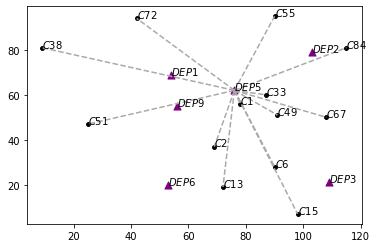

In [11]:
# Grafico almacenes
for i, p in pf.items():
    plt.scatter((p[0]), (p[1]), marker="^", color="purple", s=50)
    plt.text((p[0]), (p[1]), "${%s}$" % na[i])

# Grafico clientes
for i, p in pc.items():
    plt.scatter((p[0]), (p[1]), marker="o", color="black", s=15)
    plt.text((p[0]), (p[1]), "${%s}$" % nc[i])

dist = {(f, c): (round(sqrt((pf[c][0] - pc[f][0]) ** 2 + (pf[c][1] - pc[f][1]) ** 2), 1))
        for f in C for c in F }

m = Model()

x = {(i, j): m.add_var() for (i, j) in product(C, F)}
y = {j: m.add_var(var_type=BINARY) for j in F}

# Función Objetivo
m.objective = minimize(
    xsum(ci[j] * y[j] for j in F) + xsum(x[i,j] * dist[i,j] for (i, j) in product(C, F))
    )

# Satisfacción de la demanda
for i in C:
    m += xsum(x[(i, j)] for j in F) == d[i] #Restriccion_1 #Demanda

# Existencia de un solo almacen
m += xsum(y[j] for j in F) == 1 #Restriccion_2 #Un solo almacen

# Un almacen debe complir con toda la demanda (se complementa con Restriccion_1)
for i in C:
  for j in F:
    m += x[i,j] <= d[i]*y[j] #Restriccion_3 #Costo instalacion
    
m.optimize()

plt.savefig("localizacion_2.pdf")

if m.num_solutions:
    print("Coste minimo total: ${}".format(int(m.objective_value)))
    y_1 = []
    for j in F:
      if y[j].x == 1:
        y_1.append(na[j])
        y_1.append(ci[j])
    print("Demanda/Productos enviados => {}/{}".format(round(sum(d[i] for i in C)),round(sum([x[i,j].x for (i,j) in product(C,F)]))))
    # plotting allocations
    for (i, j) in [(i, j) for (i, j) in product(C, F) if x[(i, j)].x >= 1e-6]:
        plt.plot(
            (pf[j][0], pc[i][0]), (pf[j][1], pc[i][1]), linestyle="--", color="darkgray"
        )
plt.savefig("solucion-localizacion_1.pdf")
plt.savefig("solucion-localizacion_1.png")

In [12]:
n = 0
lista = [1]
for j in lista:
  print("Almacén {}:".format(na[j]), "Costo abrir almacén:", ci[j])
  n += ci[j]
  print("Costo total acumulado: ${}".format(n))
  for i in C:
    if(x[i,j].x != 0):
      print("Cliente {}".format(nc[i]))
      print(round(x[i,j].x), "/", d[i], "y Distancia:", dist[i,j])
      print("Costo de envío: ${}".format(round(x[i,j].x*dist[i,j]), "<=", x[i,j].x, "*", dist[i,j]))
      n += x[i,j].x*dist[i,j]
      print("Costo total acumulado: ${}".format(round(n)))

Almacén DEP5: Costo abrir almacén: 4000
Costo total acumulado: $4000
Cliente C1
45 / 45 y Distancia: 6.3
Costo de envío: $284
Costo total acumulado: $4284
Cliente C13
56 / 56 y Distancia: 43.2
Costo de envío: $2419
Costo total acumulado: $6703
Cliente C2
55 / 55 y Distancia: 26.0
Costo de envío: $1430
Costo total acumulado: $8133
Cliente C6
300 / 300 y Distancia: 36.8
Costo de envío: $11040
Costo total acumulado: $19173
Cliente C15
112 / 112 y Distancia: 59.2
Costo de envío: $6630
Costo total acumulado: $25803
Cliente C33
80 / 80 y Distancia: 11.2
Costo de envío: $896
Costo total acumulado: $26699
Cliente C67
77 / 77 y Distancia: 34.2
Costo de envío: $2633
Costo total acumulado: $29333
Cliente C84
25 / 25 y Distancia: 43.4
Costo de envío: $1085
Costo total acumulado: $30418
Cliente C49
33 / 33 y Distancia: 18.6
Costo de envío: $614
Costo total acumulado: $31031
Cliente C38
43 / 43 y Distancia: 69.6
Costo de envío: $2993
Costo total acumulado: $34024
Cliente C55
39 / 39 y Distancia: 35.

### b)
Adicionalmente, ahora cada posible almacén tiene una capacidad limitante.

Se busca encontrar la cantidad óptima de almacenes a abrir, así como su ubicación, de modo de minimizar el costo total de atender la demanda de los supermercados. En caso que haya más de un almacén a instalar, se debe señalar desde qué almacén se abastece qué supermercado. Cabe resaltar que toda la demanda debe ser cubierta.


Construya un modelo de optimización y resuelva el problema de localización y asignación planteado.


Coste mínimo total: $42122
Productos enviados/Capacidad total por almacén => [DEP5:451/600, DEP3:320/320, DEP6:200/200]
Coste de instalacion => [DEP5:$4000, DEP3:$2600, DEP6:$2100]


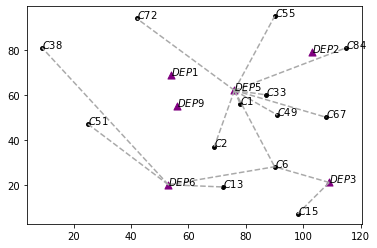

In [13]:
# Grafico almacenes
for i, p in pf.items():
    plt.scatter((p[0]), (p[1]), marker="^", color="purple", s=50)
    plt.text((p[0]), (p[1]), "${%s}$" % na[i])

# Grafico clientes
for i, p in pc.items():
    plt.scatter((p[0]), (p[1]), marker="o", color="black", s=15)
    plt.text((p[0]), (p[1]), "${%s}$" % nc[i])
    
m = Model()

x = {(i, j): m.add_var() for (i, j) in product(C, F)}
y = {j: m.add_var(var_type=BINARY) for j in F}

# Función Objetivo
m.objective = minimize(
    xsum(ci[j] * y[j] for j in F) + xsum(x[i,j] * ce[j,i] for (i, j) in product(C, F))
    )

# Satisfacción de la demanda
for i in C:
    m += xsum(x[(i, j)] for j in F) == d[i] #Restriccion_1 #Demanda

# Capacidad del almacén
for j in F:
    m += xsum(x[(i, j)] for i in C) <= c[j]*y[j] #Restriccion_2 #Capacidad

m.optimize()

plt.savefig("localizacion_2.pdf")

if m.num_solutions:
    print("Coste mínimo total: ${}".format(int(m.objective_value)))
    y_1 = []
    for j in F:
      if y[j].x == 1:
        y_1.append(na[j])
    print("Productos enviados/Capacidad total por almacén => [{}:{}/{}, {}:{}/{}, {}:{}/{}]".format(y_1[0],int(sum([x[i,1].x for i in C])),c[1],y_1[1],int(sum([x[i,3].x for i in C])),c[3],y_1[2],int(sum([x[i,4].x for i in C])), c[4]))
    y_2 = []
    for j in F:
      if y[j].x == 1:
        y_2.append(ci[j])
    print("Coste de instalacion => [{}:${}, {}:${}, {}:${}]".format(y_1[0],y_2[0],y_1[1],y_2[1],y_1[2],y_2[2]))
    
    for (i, j) in [(i, j) for (i, j) in product(C, F) if x[(i, j)].x >= 1e-6]:
        plt.plot(
            (pf[j][0], pc[i][0]), (pf[j][1], pc[i][1]), linestyle="--", color="darkgray"
        )
plt.savefig("solucion-localizacion_2.pdf")
plt.savefig("solucion-localizacion_2.png")

In [14]:
n = 0
lista = [1,3,4]
for j in lista:
  print("Almacén {}:".format(na[j]), "Costo abrir almacén: ${}".format(ci[j]))
  n += ci[j]
  print("Costo total acumulado: ${}".format(n))
  for i in C:
    if(x[i,j].x != 0):
      print("Cliente {}".format(nc[i]))
      print(round(x[i,j].x), "/", d[i], "y Costo por producto: ${}".format(ce[j,i]))
      print("Costo de envío: ${} <= {}*{}".format(round(x[i,j].x*ce[j,i]), round(x[i,j].x), ce[j,i]))
      n += x[i,j].x*ce[j,i]
      print("Costo total acumulado: ${}".format(round(n)))

Almacén DEP5: Costo abrir almacén: $4000
Costo total acumulado: $4000
Cliente C1
45 / 45 y Costo por producto: $9
Costo de envío: $405 <= 45*9
Costo total acumulado: $4405
Cliente C2
55 / 55 y Costo por producto: $45
Costo de envío: $2475 <= 55*45
Costo total acumulado: $6880
Cliente C6
36 / 300 y Costo por producto: $77
Costo de envío: $2772 <= 36*77
Costo total acumulado: $9652
Cliente C33
80 / 80 y Costo por producto: $4
Costo de envío: $320 <= 80*4
Costo total acumulado: $9972
Cliente C67
77 / 77 y Costo por producto: $34
Costo de envío: $2618 <= 77*34
Costo total acumulado: $12590
Cliente C84
25 / 25 y Costo por producto: $55
Costo de envío: $1375 <= 25*55
Costo total acumulado: $13965
Cliente C49
33 / 33 y Costo por producto: $23
Costo de envío: $759 <= 33*23
Costo total acumulado: $14724
Cliente C55
39 / 39 y Costo por producto: $56
Costo de envío: $2184 <= 39*56
Costo total acumulado: $16908
Cliente C72
61 / 61 y Costo por producto: $72
Costo de envío: $4392 <= 61*72
Costo tota